# Web scraping with BeautifulSoup

The objective for this notebook is to learn how to scrape websites via BeaufitulSoup.

## 1. Concept behind web scraping

Web scraping (or web crawling) is the action of extracting information from websites. To perform this task 4 main packages are used: Requests, BeautifulSoup, Selenium and Scrapy. The idea behind a web page is that the web browser makes a request to a web server which sends back, as a response, files that tell the web browser how too render the page. The main file types are HTML (main content), CSS (style), JS (Javascript interactivity) and Images (to show pictures).

## 2. HyperText Markup Language (HTML)

HTML tells web browsers how to layout content. Here is an HTML example:

In [1]:
%%HTML

<html>
<hr>
<head> This is the HTML head!! </head>
<body>
<h2> This is a title </h2>
<h4> Sample HTML </h4>

<p>This is a <b>paragraph</b>. <br> This is a paragraph to write text.</p>
<hr>
</body>
</html>

Detailed information about HTML and its content structure can be found at this [link](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).

## 3. Access HTML code

Access to the HTML code is done for example via Google Chrome by using the `Crtl/Cmd + Shift + C` command.

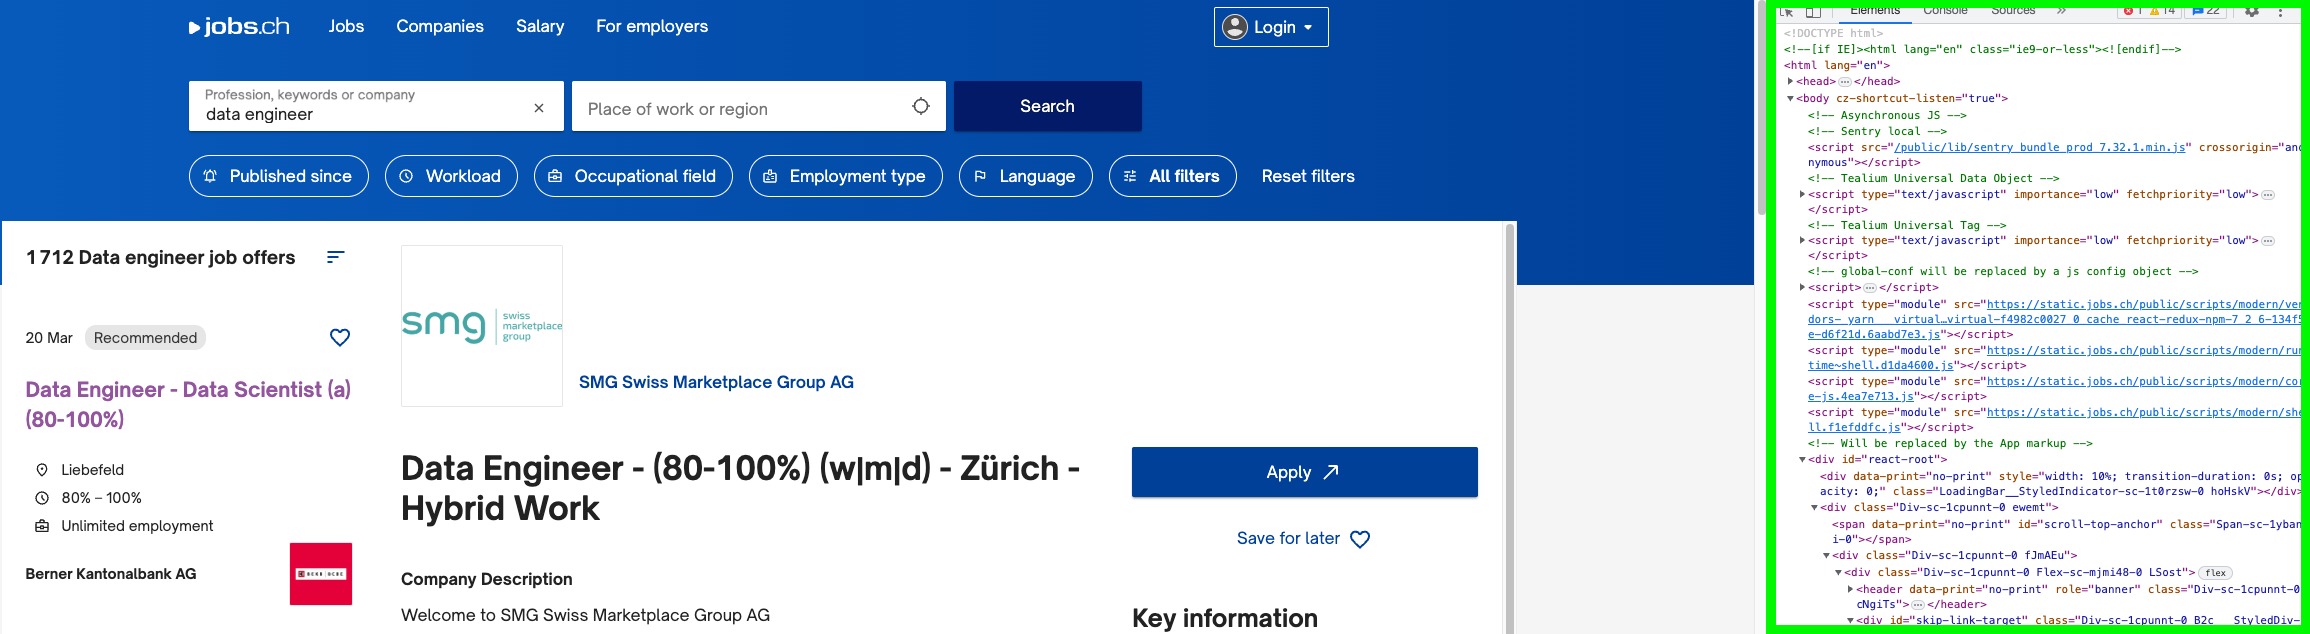

This HTML contains attributes (below a small example). Attributes include `id` (name to an element), `title`, `class` (assigns elements to groups) and `style`.

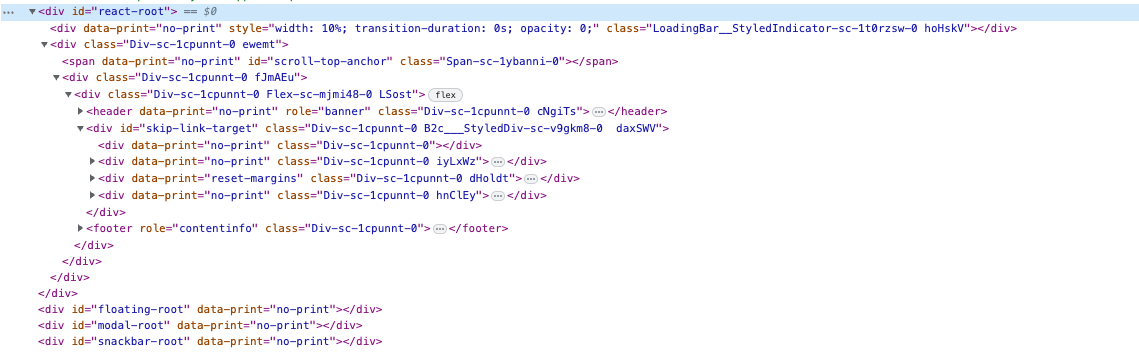

## 4. Requests library

A common way to download the web page that needs to be scraped is to use the Python `requests` library. The concept is the same as making HTTP requests for APIs/JSON queries, more details in the notebook [http_requests](https://github.com/mikjf/APIs_JSON_queries/blob/main/http_requests.ipynb) from the APIs_JSON_queries repository.

In [2]:
# import requests package
import requests

### 4.1 Simple web page

In [3]:
# GET request to very simple page
# timeout -> max number of seconds that requests.get() waits for an answer (otherwise the request will run indefinitely)
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html", timeout=15)

# print content and information
print(page)
print(page.status_code) # OK status code
print(page.content) # print page content

<Response [200]>
200
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


In [4]:
# structures HTML format
print(page.text)

<!DOCTYPE html>
<html>
    <head>
        <title>A simple example page</title>
    </head>
    <body>
        <p>Here is some simple content for this page.</p>
    </body>
</html>


### 4.2 Jobs.ch web page

In [5]:
# GET request jobs.ch
page = requests.get('https://www.jobs.ch/en/vacancies/?term=Data%20Scientist', timeout=15)
print(page)
print(page.status_code)
print(page.content[:4000])

<Response [200]>
200
b'<!doctype html>\n<!--[if IE]><html lang="en" class="ie9-or-less"><![endif]-->\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0" />\n    <title>554 Data Scientist jobs - jobs.ch</title>\n\n    <!-- No cache for index.html -->\n    \n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    <link rel="preconnect" href="https://media.jobs.ch/" />\n    \n\n    <link rel="preconnect" href="https://static.jobs.ch" />\n    \n\n    <link rel="dns-prefetch" href="https://static.jobs.ch" />\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/7a2ee78b17d5d17c7910.woff2" importance="high" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/d1da9e7330cb893d5d84.woff2" importance="high" fetchpriority=

For complex pages there are too many elements in 'page.content' which makes it difficult to read. Using the BeautifulSoup package will make the task much easier.

## 5. Parsing with BeautifulSoup

This HTML/XML parser analyses the content and provides easy-to-use methods to access specific elements. The page used is the same as in 4.2.

### 5.1 Import libraries and parsing

In [6]:
# import BeautifulSoup
from bs4 import BeautifulSoup

# import regex for regular expression matching
import re

# import pandas
import pandas as pd

# import numpy
import numpy as np

In [7]:
# convert page content into BeautifulSoup object
soup = BeautifulSoup(page.content, 'html.parser')

In [8]:
# check type
type(soup)

bs4.BeautifulSoup

In [9]:
# find link
soup.find('link').get('href')

'https://media.jobs.ch/'

In [10]:
# access specific link
soup.findAll('link')[4].get('href')

'/public/fonts/7a2ee78b17d5d17c7910.woff2'

In [11]:
# get text from soup
soup.get_text()[:4000]

'\n\n\n\n\n\n554 Data Scientist jobs - jobs.ch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nYou are currently using an obsolete browser which is no longer 100% supported. It can cause display problems.Please upgrade your browser.Some alternatives: Firefox, Chrome.Skip to contentjobs.ch Navigation logoJobsCompaniesSalaryFor employersData Scientist - All regionsProfession, keywords or companyData ScientistPlace of work or regionChoose a regionSearchPublished sinceWorkloadOccupational fieldEmployment typeLanguageAll filtersReset filters554 Data Scientist job offersBy dateBy relevancePublished: 21 Februar 202321 Feb.GTP - Trading Data ScientistZürich100%Unlimited employmentVontobelPublished: 09 März 202309 MärzNLP Machine Learning Data Scientist (w/m/d)Bern80% – 100%Unlimited employmentdie MobiliarPublished: 03 März 202303 MärzDatenspezialist:in / Data Scientist 80-100% (m/w/d)Zürich80% – 100%Unlimited employmentWüest Partne

In [12]:
# find first attribute tag <a>...</a>
soup.find('a')

<a class="A-sc-1q4zv2a-0 Link-sc-czsz28-2 bzpUGN" data-event-type="external_link" href="https://www.mozilla.org/en-US/firefox/new/" rel="noopener noreferrer nofollow" target="_blank">Firefox</a>

In [13]:
# find all attributes tag <a>...</a>
soup.findAll('a')[:3]

[<a class="A-sc-1q4zv2a-0 Link-sc-czsz28-2 bzpUGN" data-event-type="external_link" href="https://www.mozilla.org/en-US/firefox/new/" rel="noopener noreferrer nofollow" target="_blank">Firefox</a>,
 <a class="A-sc-1q4zv2a-0 Link-sc-czsz28-2 bzpUGN" data-event-type="external_link" href="https://www.google.com/intl/en_us/chrome/" rel="noopener noreferrer nofollow" target="_blank">Chrome</a>,
 <a class="A-sc-1q4zv2a-0 Header___StyledA-sc-8dvuun-0 dkySHH JDvaB" href="#skip-link-target" id="skip-link" text-decoration="none">Skip to content</a>]

In [14]:
# filter <a> tag with specific attributes (key 'data_cy' has 'job-link' as value)
soup.findAll('a', {'data-cy': 'job-link'})[0]

<a class="Link__ExtendedRR6Link-sc-czsz28-1 jzwvjr Link-sc-czsz28-2 VacancyLink___StyledLink-sc-ufp08j-0 bzpUGN zoplL" data-cy="job-link" data-event-type="internal_link" href="/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search" tabindex="0" title="GTP - Trading Data Scientist"><div aria-selected="true" class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__StyledSerpItem-sc-i0986f-1 hBFpng dFEfiy" data-cy="vacancy-serp-item-active"><div class="Div-sc-1cpunnt-0 Flex-sc-mjmi48-0 bHInWw" data-cy="serp-item-97a0811c-d61b-484c-91ff-c86278eaf63a"><p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 VacancySerpItemUpdated___StyledText-sc-i0986f-3 geNnlb iAfDeY"><span class="Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 ftUOUz eEFkdA">Published: 21 Februar 2023</span><span aria-hidden="true" class="Span-sc-1ybanni-0" title="21 Februar 2023">21 Feb.</span></p></div><button aria-label="Save" class="But

In [15]:
# find length of above filter
len(soup.findAll('a', {'data-cy': 'job-link'}))

21

In [16]:
# extract data from element of interest (i.e. first data scientist job which has index 0)
soup.findAll('a', {'data-cy': 'job-link'})[0].attrs

{'data-event-type': 'internal_link',
 'data-cy': 'job-link',
 'tabindex': '0',
 'title': 'GTP - Trading Data Scientist',
 'class': ['Link__ExtendedRR6Link-sc-czsz28-1',
  'jzwvjr',
  'Link-sc-czsz28-2',
  'VacancyLink___StyledLink-sc-ufp08j-0',
  'bzpUGN',
  'zoplL'],
 'href': '/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search'}

In [17]:
# exact link of specific job page (specific key/value pair of dictionary)
soup.findAll('a', {'data-cy': 'job-link'})[0].get('href')

'/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search'

### 5.2 Inspect source code from web browser

The best way to select the correct component and find the corresponding element in the html code is via the html code inspection. While going through the elements we can notice that for every job (box on the left) the content is in a separate div `Div-sc-1cpunnt-0` and has always a class attribute `VacancySerpItemUpdated__ShadowBox-sc-i0986f-0`.

In [18]:
# note: as the website gets updated the classes might be different

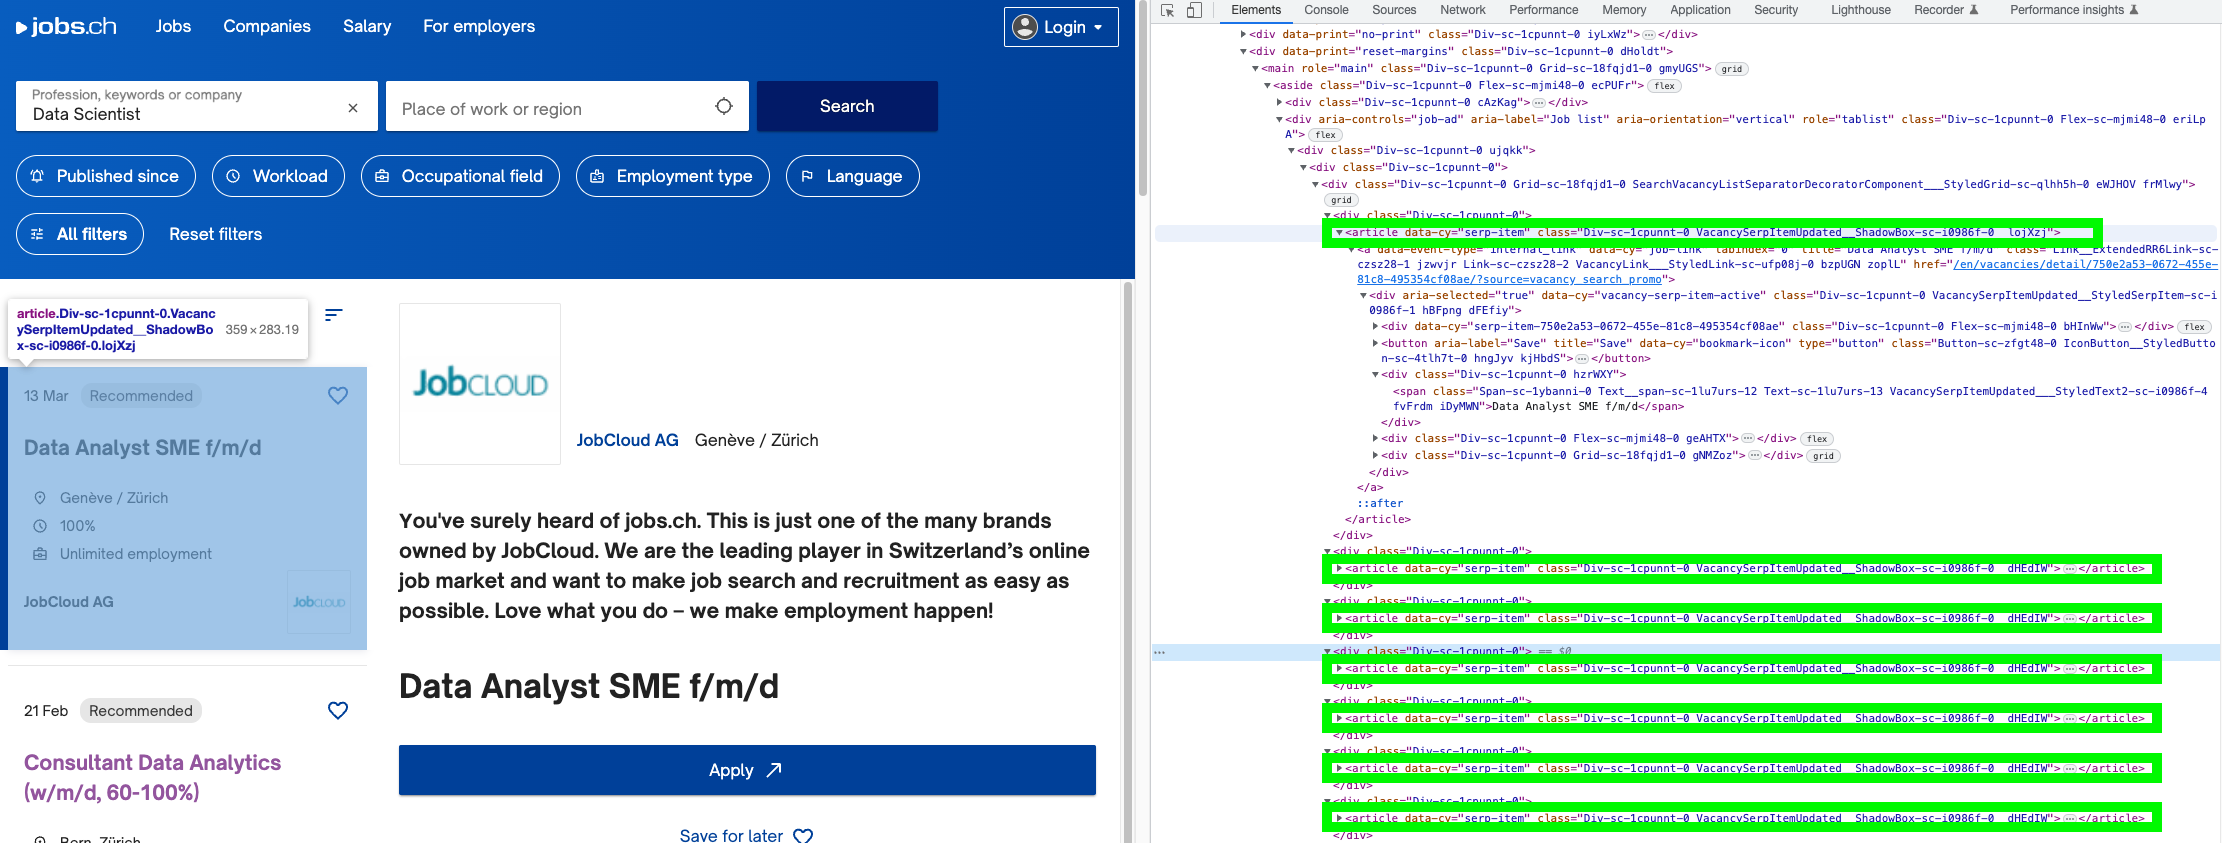

In [19]:
# get html element for a job (here finding how many 'not recommended' jobs are present in the current page)
len(soup.findAll('article', {'class': 'VacancySerpItemUpdated__ShadowBox-sc-i0986f-0'}))

20

In [20]:
# get first job ad element
one_job_ad = soup.find('article', {'class': 'VacancySerpItemUpdated__ShadowBox-sc-i0986f-0'})
one_job_ad

<article class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__ShadowBox-sc-i0986f-0 lojXzj" data-cy="serp-item"><a class="Link__ExtendedRR6Link-sc-czsz28-1 jzwvjr Link-sc-czsz28-2 VacancyLink___StyledLink-sc-ufp08j-0 bzpUGN zoplL" data-cy="job-link" data-event-type="internal_link" href="/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search" tabindex="0" title="GTP - Trading Data Scientist"><div aria-selected="true" class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__StyledSerpItem-sc-i0986f-1 hBFpng dFEfiy" data-cy="vacancy-serp-item-active"><div class="Div-sc-1cpunnt-0 Flex-sc-mjmi48-0 bHInWw" data-cy="serp-item-97a0811c-d61b-484c-91ff-c86278eaf63a"><p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 VacancySerpItemUpdated___StyledText-sc-i0986f-3 geNnlb iAfDeY"><span class="Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 ftUOUz eEFkdA">Published: 21 Februar 2023</span><span aria-hidden="true" cla

In [21]:
# find out how many jobs are in the first page (by using div class, same result as above)
job_ads = soup.findAll('article', {'class' : 'Div-sc-1cpunnt-0'})
len(job_ads)

20

In [22]:
# inspect last job box in the list
job_ads[-1]

<article class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__ShadowBox-sc-i0986f-0 dHEdIW" data-cy="serp-item"><a class="Link__ExtendedRR6Link-sc-czsz28-1 jzwvjr Link-sc-czsz28-2 VacancyLink___StyledLink-sc-ufp08j-0 bzpUGN zoplL" data-cy="job-link" data-event-type="internal_link" href="/en/vacancies/detail/15e3f846-f034-4e19-ad9a-c13cb7bceb5e/?source=vacancy_search" tabindex="0" title="Data Engineer 80 - 100%"><div class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__StyledSerpItem-sc-i0986f-1 hBFpng jVoBIW" data-cy="vacancy-serp-item"><div class="Div-sc-1cpunnt-0 Flex-sc-mjmi48-0 bHInWw" data-cy="serp-item-15e3f846-f034-4e19-ad9a-c13cb7bceb5e"><p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 VacancySerpItemUpdated___StyledText-sc-i0986f-3 geNnlb iAfDeY"><span class="Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 ftUOUz eEFkdA">Published: 17 März 2023</span><span aria-hidden="true" class="Span-sc-1ybanni-0" title="17 Mär

### 5.3 Extract individual pieces of information

As `job_ads` data block has now been identified, every piece of information within each job ad can be extracted. The information is located within an `<a>` tag.

In [23]:
# get individual job link (works only because there is only one 'a' tag per job box)
job_ads[0].find('a').get('href')

'/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search'

In [24]:
# get individual job link (best way by specifying attribute)
job_ads[0].find('a', {'data-cy': 'job-link'}).get('href')

'/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search'

To access the link from outside the page the full URL must be rebuilt, prefix included.

In [25]:
# full url link for job ad page
'https://www.jobs.ch' + job_ads[0].find('a',{'data-cy' : 'job-link'}).get('href')

'https://www.jobs.ch/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search'

In [26]:
# isolate url part of job specific page
job_ads[0].find('a', {'data-cy': 'job-link'}).get('href').split('/')[4]

'97a0811c-d61b-484c-91ff-c86278eaf63a'

In [27]:
# get all full url links for the 20 job ad boxes in first page
['https://www.jobs.ch' + job.find('a',{'data-cy' : 'job-link'}).get('href') for job in job_ads]

['https://www.jobs.ch/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/1b953d68-08f9-49d0-967e-3f6a75e50a50/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/955a9cde-9f0f-4f4d-a1f6-7d88e8b2f18a/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/750e2a53-0672-455e-81c8-495354cf08ae/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/dffed1af-28a9-4f9a-8f53-19efce04ca18/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/2fcbbafc-bfa3-4e19-9837-3870fbba5435/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/3ae98323-a1e9-4db4-ba88-7b9f004b6b98/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/09ed1232-9e93-4340-885f-67c53c0c3495/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/632795de-6bbf-4dab-a1e7-5f385ddcd3ed/?source=vacancy_search',
 'https://www.jobs.ch/en/vacancies/detail/9504d4b5-7006-459e-b14

In [28]:
# length check (should be 20 job ad boxes in first page)
len(['https://www.jobs.ch' + job.find('a',{'data-cy' : 'job-link'}).get('href') for job in job_ads])

20

Within the `<a>` element there is an attribute called `title`, which is the title of the ad itself. Let's extract all relevant information to build a table with all the information:

In [29]:
# job link
'https://www.jobs.ch' + job_ads[0].find('a',{'data-cy' : 'job-link'}).get('href')

'https://www.jobs.ch/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search'

In [30]:
# job title
job_ads[0].find('a', {'data-cy': 'job-link'}).get('title')

'GTP - Trading Data Scientist'

In [31]:
# job location
job_ads[0].find('p', {'class': ["P-sc-hyu5hk-0", "Text__p2-sc-1lu7urs-9"]}).find_next('p').get_text()

'Zürich'

In [32]:
# job company name
job_ads[0].find('p', {'class': ["P-sc-hyu5hk-0", "Text__p2-sc-1lu7urs-9"]}).find_next('p').find_next('p').find_next('p').find_next('p').get_text()

'Vontobel'

In [33]:
# job posting date
job_ads[0].find("span", attrs={"aria-hidden": "true", "class": "Span-sc-1ybanni-0"}).get("title")

'21 Februar 2023'

In [34]:
job_ads[0]

<article class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__ShadowBox-sc-i0986f-0 lojXzj" data-cy="serp-item"><a class="Link__ExtendedRR6Link-sc-czsz28-1 jzwvjr Link-sc-czsz28-2 VacancyLink___StyledLink-sc-ufp08j-0 bzpUGN zoplL" data-cy="job-link" data-event-type="internal_link" href="/en/vacancies/detail/97a0811c-d61b-484c-91ff-c86278eaf63a/?source=vacancy_search" tabindex="0" title="GTP - Trading Data Scientist"><div aria-selected="true" class="Div-sc-1cpunnt-0 VacancySerpItemUpdated__StyledSerpItem-sc-i0986f-1 hBFpng dFEfiy" data-cy="vacancy-serp-item-active"><div class="Div-sc-1cpunnt-0 Flex-sc-mjmi48-0 bHInWw" data-cy="serp-item-97a0811c-d61b-484c-91ff-c86278eaf63a"><p class="P-sc-hyu5hk-0 Text__p2-sc-1lu7urs-10 Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 VacancySerpItemUpdated___StyledText-sc-i0986f-3 geNnlb iAfDeY"><span class="Span-sc-1ybanni-0 Text__span-sc-1lu7urs-12 Text-sc-1lu7urs-13 ftUOUz eEFkdA">Published: 21 Februar 2023</span><span aria-hidden="true" cla

In [35]:
# we use try and except because sometimes there info data missing

def get_jobdata_page(job_ads):

    cols = ["title", "company", "area", "date", "link"]
    df = pd.DataFrame(columns = cols)

    for i in range(len(job_ads)):

        url = 'https://www.jobs.ch' + job_ads[i].find('a',{'data-cy' : 'job-link'}).get('href')
        try:
            title = job_ads[i].find('a', {'data-cy': 'job-link'}).get('title')
        except AttributeError:
            title = np.nan

        try:
            company = job_ads[i].find('p', {'class': ["P-sc-hyu5hk-0", "Text__p2-sc-1lu7urs-9"]}).find_next('p').find_next('p').find_next('p').find_next('p').get_text()
        except AttributeError: 
            company = np.nan

        try:
            area = job_ads[i].find('p', {'class': ["P-sc-hyu5hk-0", "Text__p2-sc-1lu7urs-9"]}).find_next('p').get_text()
        except AttributeError: 
            area = np.nan

        try:
            date = job_ads[i].find("span", attrs={"aria-hidden": "true", "class": "Span-sc-1ybanni-0"}).get("title")
        except AttributeError: 
            date = np.nan

        job_dict = { 
          'title': title, 
          'company': company, 
          'area': area, 
          'date': date,
          'link':url }

        #df = df.append(job_dict, ignore_index=True) -> append is now deprecated, using concat instead
        df = pd.concat([df, pd.DataFrame([job_dict])],ignore_index=True)

    return df

In [36]:
df = get_jobdata_page(job_ads)

In [37]:
df.head()

,title,company,area,date,link
0,GTP - Trading Data Scientist,Vontobel,Zürich,21 Februar 2023,https://www.jobs.ch/en/vacancies/detail/97a081...
1,NLP Machine Learning Data Scientist (w/m/d),die Mobiliar,Bern,09 März 2023,https://www.jobs.ch/en/vacancies/detail/1b953d...
2,Datenspezialist:in / Data Scientist 80-100% (m...,Wüest Partner,Zürich,03 März 2023,https://www.jobs.ch/en/vacancies/detail/955a9c...
3,Data Analyst SME f/m/d,JobCloud AG,Genève / Zürich,13 März 2023,https://www.jobs.ch/en/vacancies/detail/750e2a...
4,Senior Data Analyst (a),Bedag Informatik AG,"Bern, Gutenbergstrasse",22 März 2023,https://www.jobs.ch/en/vacancies/detail/dffed1...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20 non-null     object
 1   company  20 non-null     object
 2   area     20 non-null     object
 3   date     20 non-null     object
 4   link     20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


In [39]:
df.to_csv('data_scientist_jobs.csv')